In [563]:
# Librerías para ciencia de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hotel Booking Dataset – Descripción de los features

| Feature | Description |
|--------|-------------|
| hotel | Hotel type: H1 = Resort Hotel, H2 = City Hotel |
| is_canceled | Whether the booking was canceled (1=yes, 0=no) |
| lead_time | Days between booking and arrival |
| arrival_date_year | Arrival year |
| arrival_date_month | Arrival month (string) |
| arrival_date_week_number | Week number of arrival date |
| arrival_date_day_of_month | Day of month of arrival date |
| stays_in_weekend_nights | Weekend nights (Sat–Sun) stayed or booked |
| stays_in_week_nights | Week nights (Mon–Fri) stayed or booked |
| adults | Number of adults |
| children | Number of children |
| babies | Number of babies |
| meal | Meal type (SC, BB, HB, FB) |
| country | Country of origin (ISO 3155–3) |
| market_segment | Market segment (TA = Travel Agents, TO = Tour Operators) |
| distribution_channel | Distribution channel (TA = Travel Agents, TO = Tour Operators) |
| is_repeated_guest | Whether guest is repeated (1=yes, 0=no) |
| previous_cancellations | Number of previous cancellations |
| previous_bookings_not_canceled | Number of previous non-canceled bookings |
| reserved_room_type | Reserved room code (anonymized) |
| assigned_room_type | Assigned room code (may differ from reserved) |
| booking_changes | Number of changes made to the booking |
| deposit_type | Deposit type (No Deposit, Non Refund, Refundable) |
| agent | Travel agency ID |
| company | Company/Entity ID responsible for booking |
| days_in_waiting_list | Days the booking was on waiting list |
| customer_type | Booking type (Contract, Group, Transient, Transient-party) |
| adr | Average Daily Rate |
| required_car_parking_spaces | Required parking spaces |
| total_of_special_requests | Count of special requests |
| reservation_status | Final status (Canceled, Check-Out, No-Show) |
| reservation_status_date | Date of last reservation status update |


In [564]:
# Importar el csv
df = pd.read_csv('/Users/mirandag/Documents/BI/Sin título/hotel_bookings.csv')

In [565]:
# Observamos el tipo de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [566]:
# Observamos la estructura del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [567]:
# Valores nulos
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [568]:
# Borra las instancias donde children sea Nan
df.dropna(subset=['children'], inplace=True)

# Borra las instancias donde country es NA
df.dropna(subset=['country'], inplace=True)

In [569]:
# Mostramos la estructura de los features realacionados a la fecha
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month
0,2015,July,1
1,2015,July,1
2,2015,July,1
3,2015,July,1
4,2015,July,1


In [570]:
# Juntamos las columnas y reducimos la dimensionalidad para tener solo una columna de fecha
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

# Organizamos la nueva columna para dejarla como estaban las columnas relacionadas a la fecha
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index('arrival_date')))
df = df.loc[:, cols]

# Borramos las columnas de fecha originales
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', "agent", "company"], axis=1, inplace=True)

In [571]:
# Cambia el tipo de arrival_date a date time
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Cambia el tipo de is_canceled a bool
df['is_canceled'] = df['is_canceled'].astype(bool)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

# Cambia el tipo de children a int
df['children'] = df['children'].astype(int)

In [572]:
df['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [573]:
# Verificamos que el tipo de datos sea correcto y no haya valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  bool          
 2   lead_time                       118898 non-null  int64         
 3   arrival_date                    118898 non-null  datetime64[ns]
 4   arrival_date_week_number        118898 non-null  int64         
 5   stays_in_weekend_nights         118898 non-null  int64         
 6   stays_in_week_nights            118898 non-null  int64         
 7   adults                          118898 non-null  int64         
 8   children                        118898 non-null  int64         
 9   babies                          118898 non-null  int64         
 10  meal                            118898 non-null  object      

In [574]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date                      0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

In [575]:
df.head()

,hotel,is_canceled,lead_time,arrival_date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015-07-01,27,0,0,2,0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2015-07-01,27,0,0,2,0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015-07-01,27,0,1,1,0,0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015-07-01,27,0,1,1,0,0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015-07-01,27,0,2,2,0,0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [576]:
# Eliminamos algunas columnas que consideramos no eran útiles para nuestro análisis y entrenamiento
df.drop(['booking_changes', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'total_of_special_requests'], axis=1, inplace=True)

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  bool          
 2   lead_time                       118898 non-null  int64         
 3   arrival_date                    118898 non-null  datetime64[ns]
 4   arrival_date_week_number        118898 non-null  int64         
 5   stays_in_weekend_nights         118898 non-null  int64         
 6   stays_in_week_nights            118898 non-null  int64         
 7   adults                          118898 non-null  int64         
 8   children                        118898 non-null  int64         
 9   babies                          118898 non-null  int64         
 10  meal                            118898 non-null  object      

In [578]:
# features cuantitativas
df.describe(include='number')


,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,27.166555,0.928897,2.502145,1.858391,0.104207,0.007948,0.087142,0.131634,2.330754,102.003243
std,106.903309,13.589971,0.996216,1.900168,0.578576,0.399172,0.097380,0.845869,1.484672,17.630452,50.485862
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
50%,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000
75%,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,737.000000,53.000000,16.000000,41.000000,55.000000,10.000000,10.000000,26.000000,72.000000,391.000000,5400.000000


In [579]:
df.select_dtypes(include='number').columns


Index(['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'adr'],
      dtype='object')

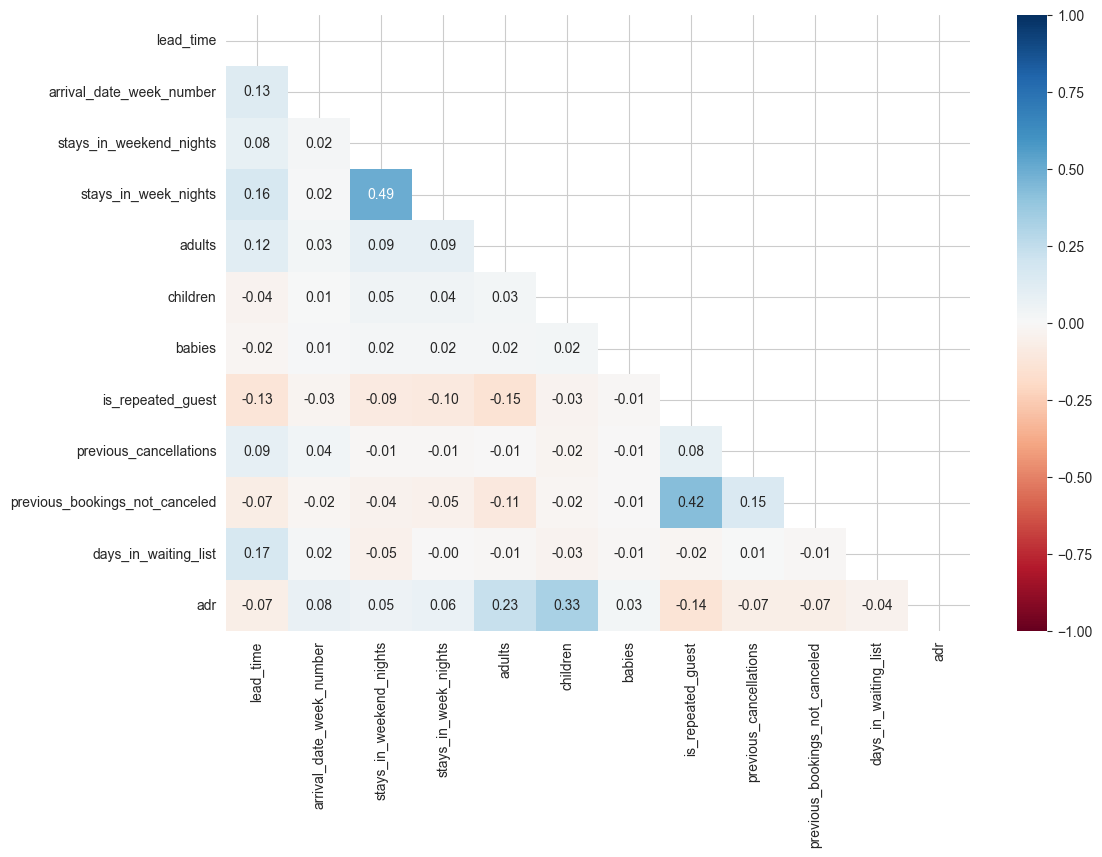

In [581]:
# Lista de features numéricos (SIN assigned_room_type y reserved_room_type)
num_features = [ 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', "children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", 'days_in_waiting_list',"adr"]

# Matriz de correlacion con num_features y muestrala
corr_matrix = df[num_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=np.triu(corr_matrix), cmap="RdBu")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

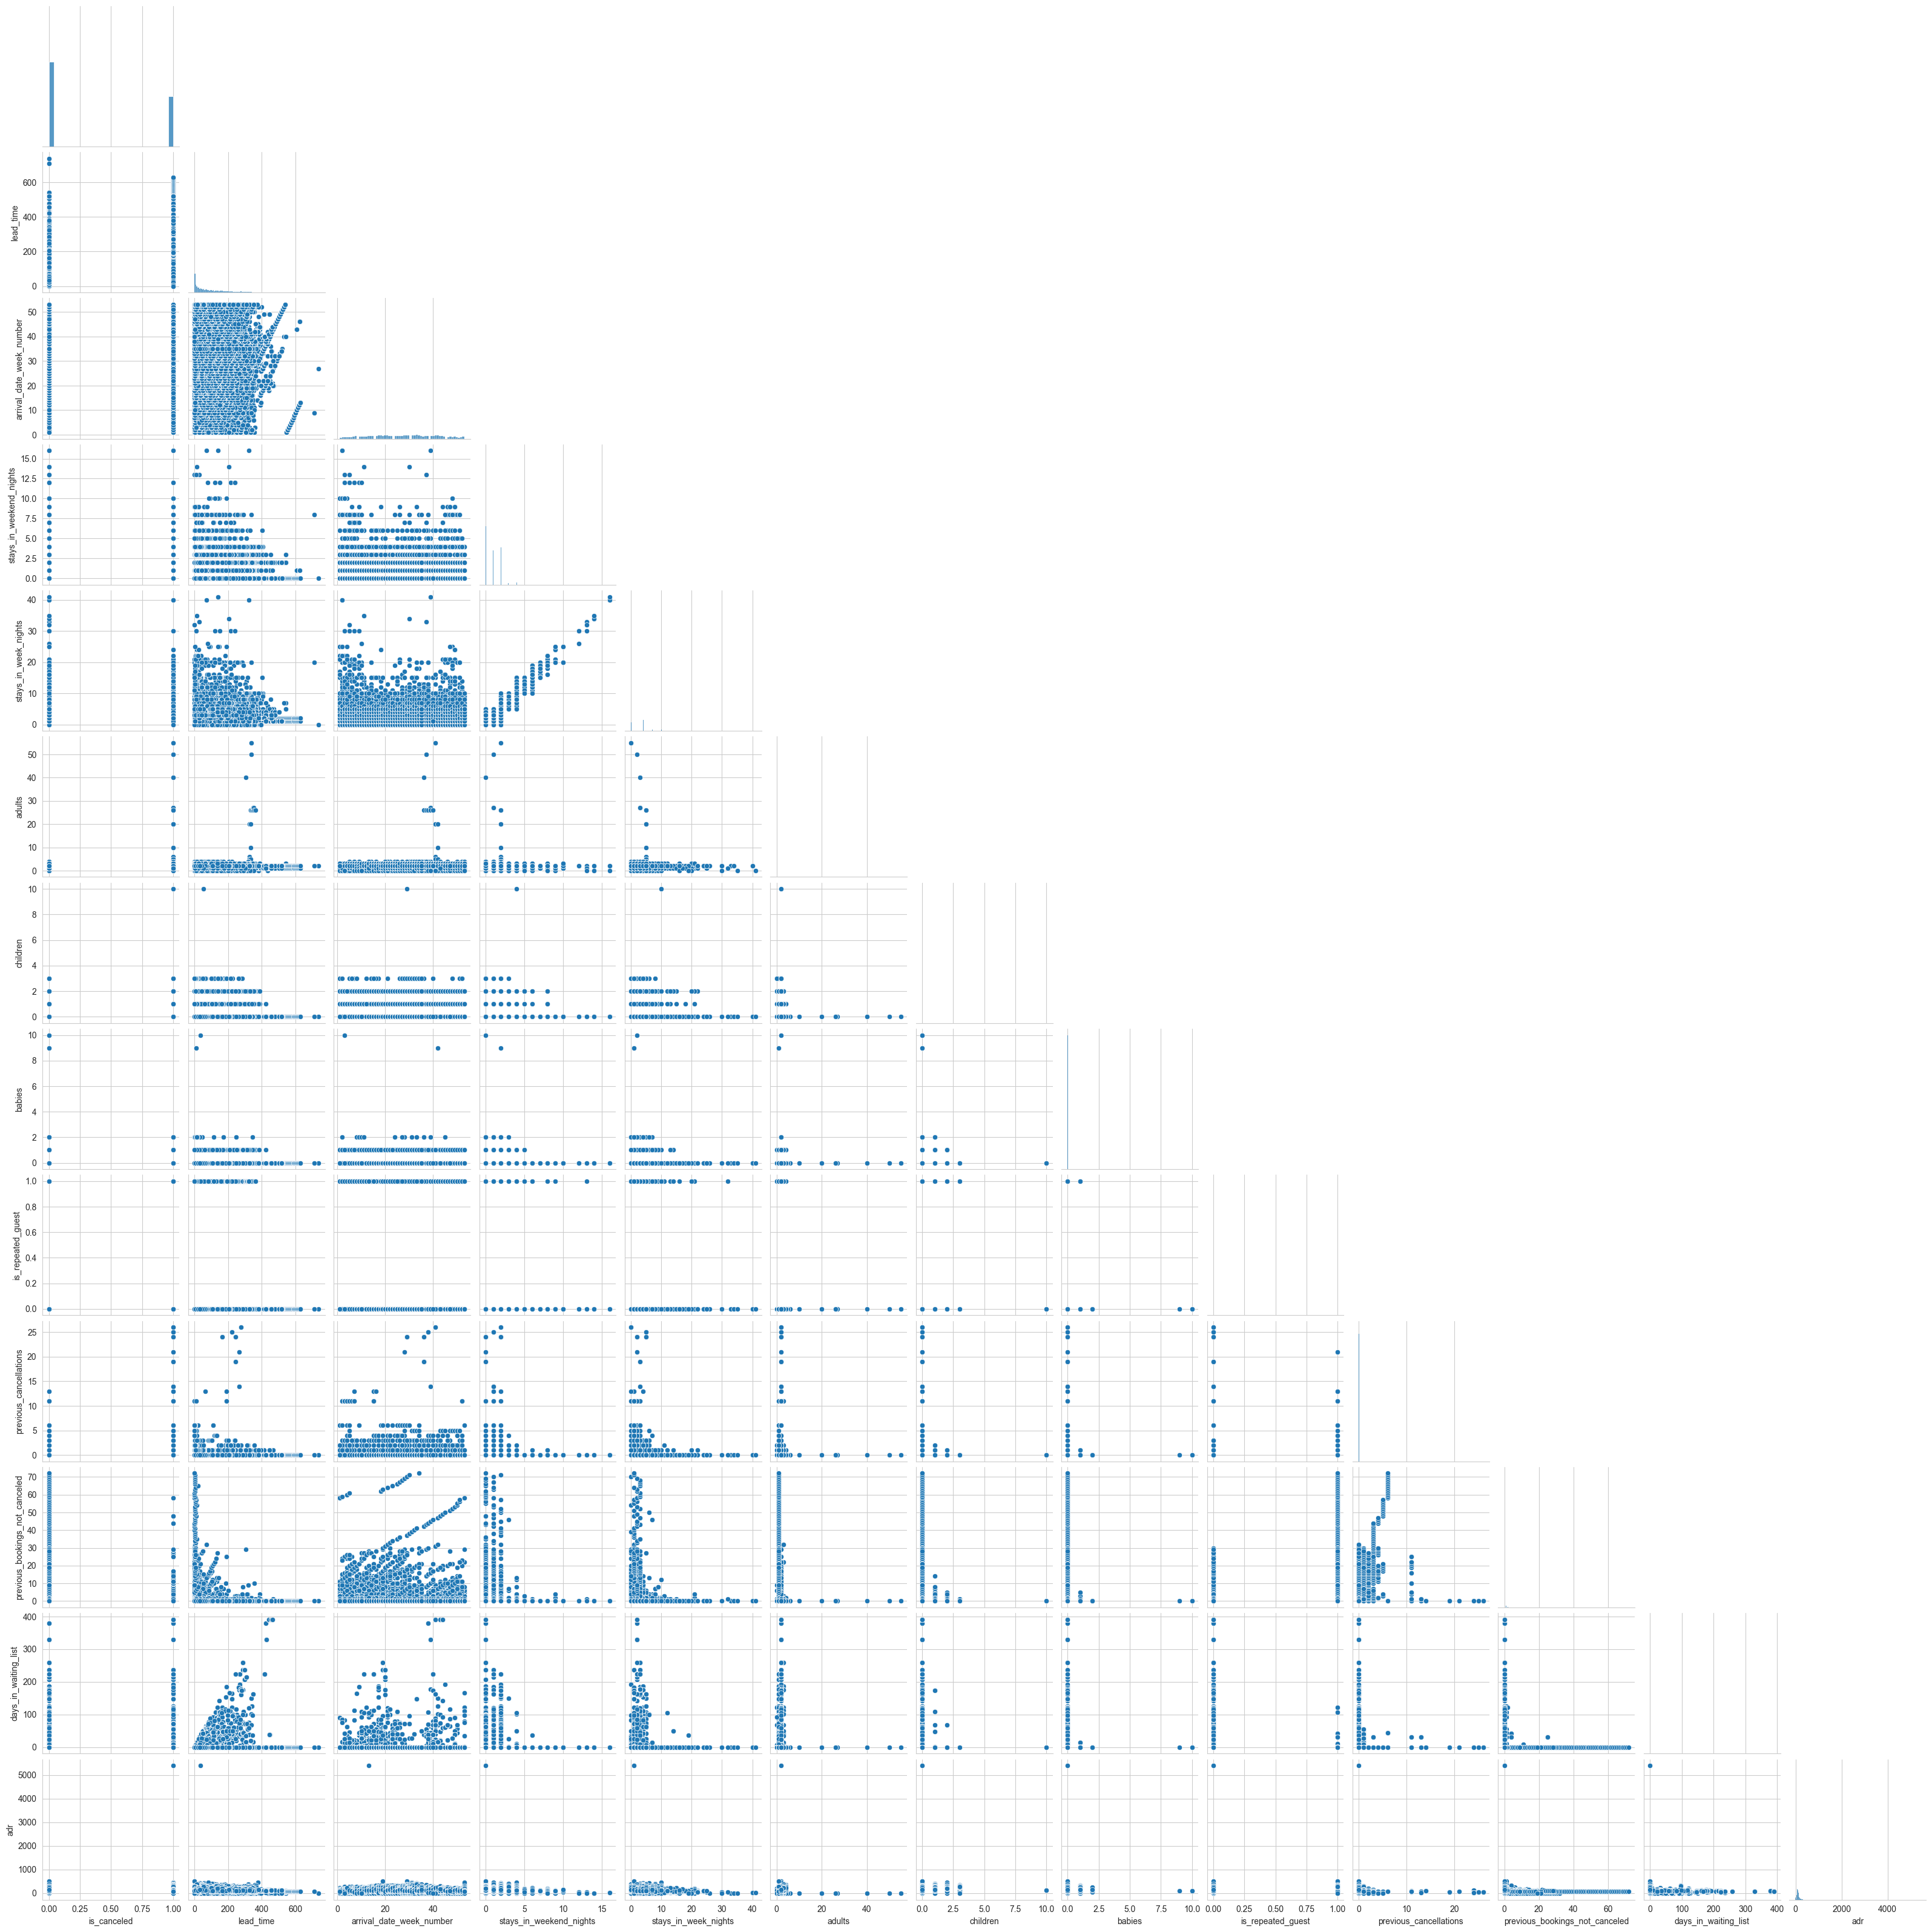

In [582]:
# Matriz de gráficos
sns.pairplot(data=df, corner="True")
plt.show

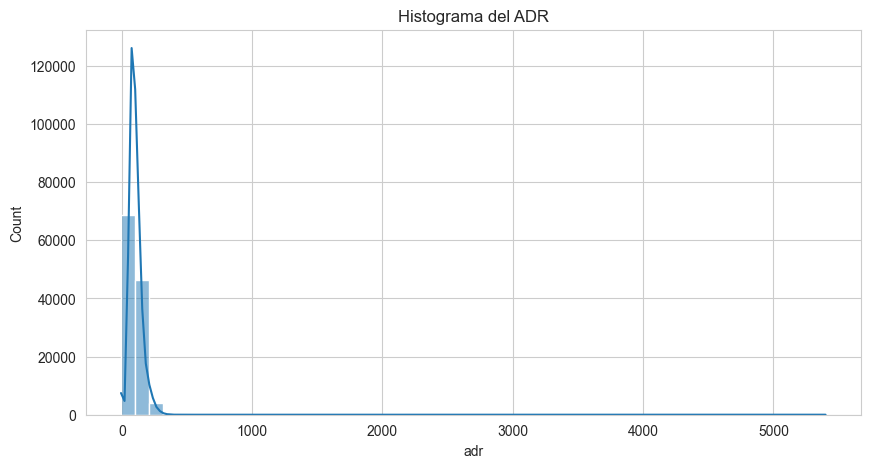

In [583]:
plt.figure(figsize=(10,5))
sns.histplot(df["adr"], bins=50, kde=True)
plt.title("Histograma del ADR")
plt.show()

In [584]:
df_original = df.copy()


In [585]:
df = df[(df['adr'] > 0) & (df['adr'] < 250)]


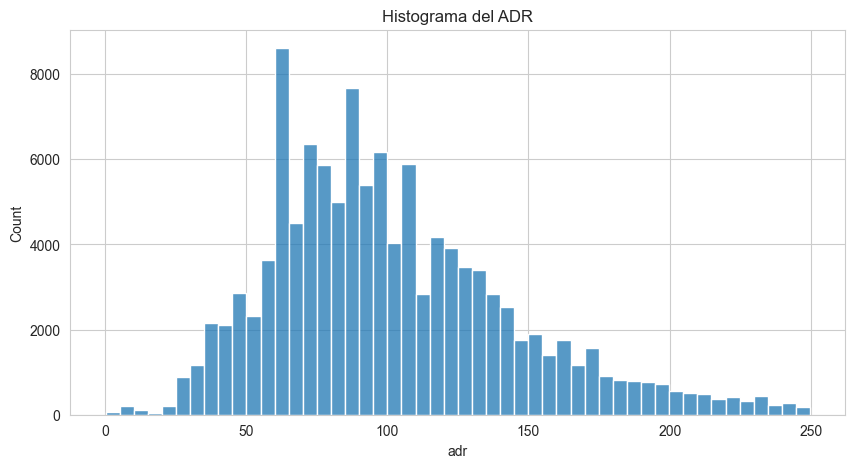

In [586]:
plt.figure(figsize=(10,5))
sns.histplot(df["adr"], bins=50)
plt.title("Histograma del ADR")
plt.show()

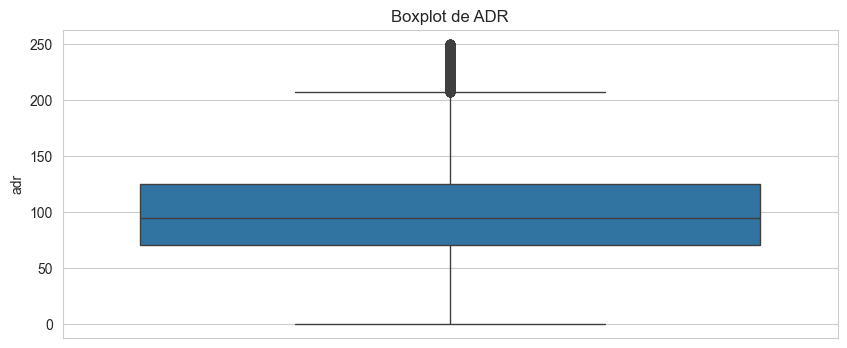

In [587]:
plt.figure(figsize=(10,4))
sns.boxplot(y=df['adr'])
plt.title("Boxplot de ADR")
plt.show()


In [588]:

total = len(df_original)
limpio = len(df)
eliminados = total - limpio
porcentaje = (eliminados / total) * 100

print(f"Registros que borramos: {eliminados}")
print(f"Porcentaje equivalente: {porcentaje:.2f}%")


Registros que borramos: 3266
Porcentaje equivalente: 2.75%


<Axes: xlabel='adults', ylabel='adr'>

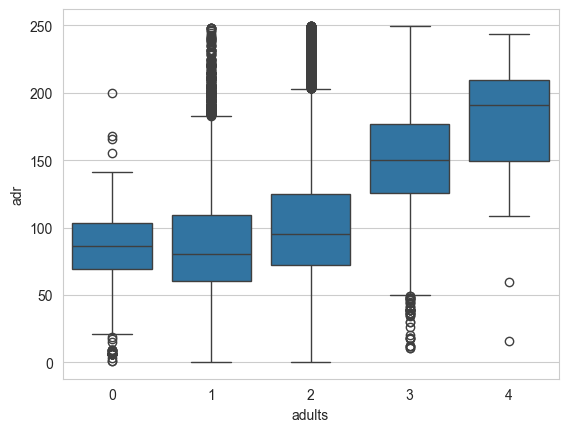

In [589]:
#children y adults son los que parecen tener mas correlacion con el adr
sns.boxplot(data=df, x="adults", y="adr")


<Axes: xlabel='children', ylabel='adr'>

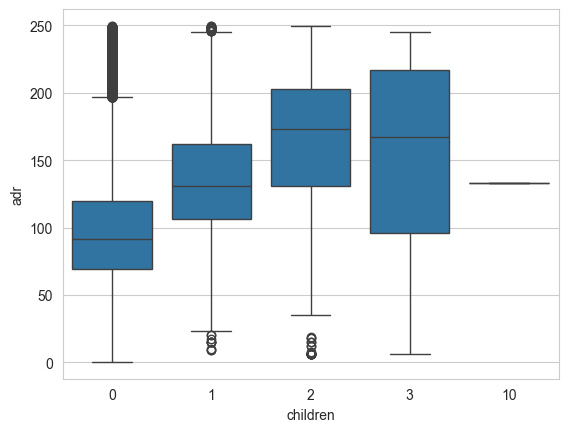

In [590]:
sns.boxplot(data=df, x="children", y="adr")


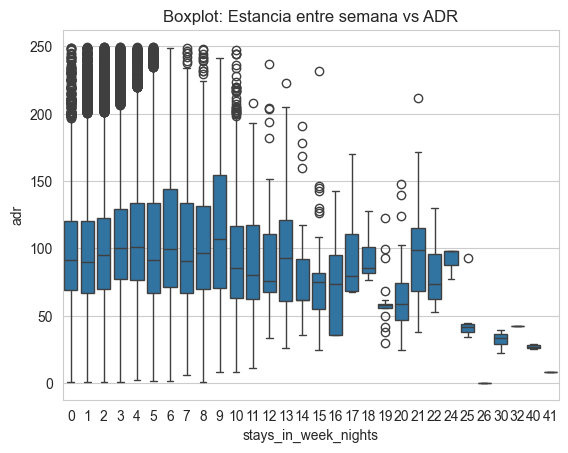

In [591]:
sns.boxplot(data=df, x='stays_in_week_nights', y='adr')
plt.title('Boxplot: Estancia entre semana vs ADR')
plt.show()


In [592]:
# un intervalo de 40 noches no es muy realsita lod ecidimos acortar a 20

df = df[(df['stays_in_week_nights'] >= 0) & (df['stays_in_week_nights'] <= 20)]


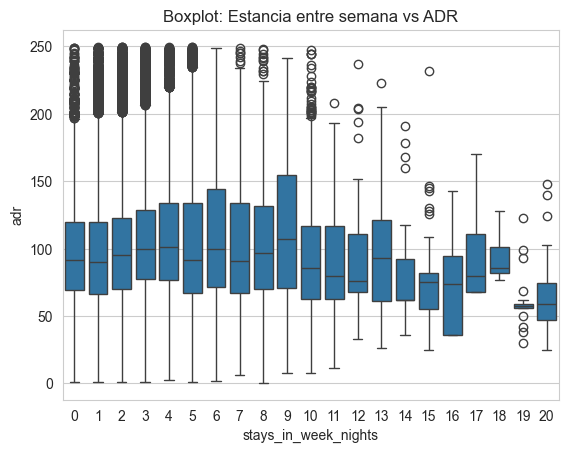

In [593]:
sns.boxplot(data=df, x='stays_in_week_nights', y='adr')
plt.title('Boxplot: Estancia entre semana vs ADR')
plt.show()


In [594]:

total = len(df_original)
limpio = len(df)
eliminados = total - limpio
porcentaje = (eliminados / total) * 100

print(f"Registros eliminados: {eliminados}")
print(f"Porcentaje eliminado: {porcentaje:.2f}%")


Registros eliminados: 3304
Porcentaje eliminado: 2.78%


CATEGORICOS (las categorias de cada uno)

In [625]:
df.select_dtypes(include='object').columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [626]:
df.drop('country',axis=1, inplace=True)

In [ ]:
df.select_dtypes(include='object').columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [634]:
catrgoricas = df.select_dtypes(include=['object'])
catrgoricas.describe().T

,count,unique,top,freq
hotel,115594,2,City Hotel,77709
meal,115594,5,BB,89619
market_segment,115594,7,Online TA,55135
distribution_channel,115594,5,TA/TO,95812
reserved_room_type,115594,9,A,84027
assigned_room_type,115594,11,A,72885
deposit_type,115594,3,No Deposit,100867
customer_type,115594,4,Transient,86486


In [636]:
catrgoricas = df.select_dtypes(include=['object'])
for var in catrgoricas:
    print(f"\n{var.upper()}:")
    print(df[var].unique())


HOTEL:
['Resort Hotel' 'City Hotel']

MEAL:
['BB' 'FB' 'HB' 'SC' 'Undefined']

MARKET_SEGMENT:
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Groups' 'Complementary'
 'Aviation']

DISTRIBUTION_CHANNEL:
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

RESERVED_ROOM_TYPE:
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'L' 'B']

ASSIGNED_ROOM_TYPE:
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']

DEPOSIT_TYPE:
['No Deposit' 'Refundable' 'Non Refund']

CUSTOMER_TYPE:
['Transient' 'Contract' 'Transient-Party' 'Group']


In [637]:
catrgoricas = df.select_dtypes(include=['object'])

catrgoricas.describe()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,115594,115594,115594,115594,115594,115594,115594,115594
unique,2,5,7,5,9,11,3,4
top,City Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient
freq,77709,89619,55135,95812,84027,72885,100867,86486


In [622]:
categoricas = ['hotel', 'meal', 'customer_type', 'market_segment',
               'distribution_channel', 'reserved_room_type',
               'assigned_room_type', 'deposit_type']

df_dummies = pd.get_dummies(df[categoricas], drop_first=True, dtype=int)

corr = df_dummies.join(df['adr']).corr()['adr'].sort_values(ascending=False)

print(corr)


adr                               1.000000
market_segment_Online TA          0.309105
reserved_room_type_F              0.221058
reserved_room_type_D              0.197819
customer_type_Transient           0.197818
assigned_room_type_F              0.194166
reserved_room_type_G              0.150974
assigned_room_type_G              0.147435
meal_HB                           0.118244
reserved_room_type_E              0.117942
reserved_room_type_C              0.096004
assigned_room_type_E              0.091671
market_segment_Direct             0.091105
reserved_room_type_H              0.086168
assigned_room_type_D              0.080962
assigned_room_type_H              0.072819
distribution_channel_Direct       0.055886
distribution_channel_TA/TO        0.051219
assigned_room_type_C              0.021609
distribution_channel_GDS          0.020359
reserved_room_type_L              0.003888
distribution_channel_Undefined    0.000763
meal_FB                           0.000431
assigned_ro

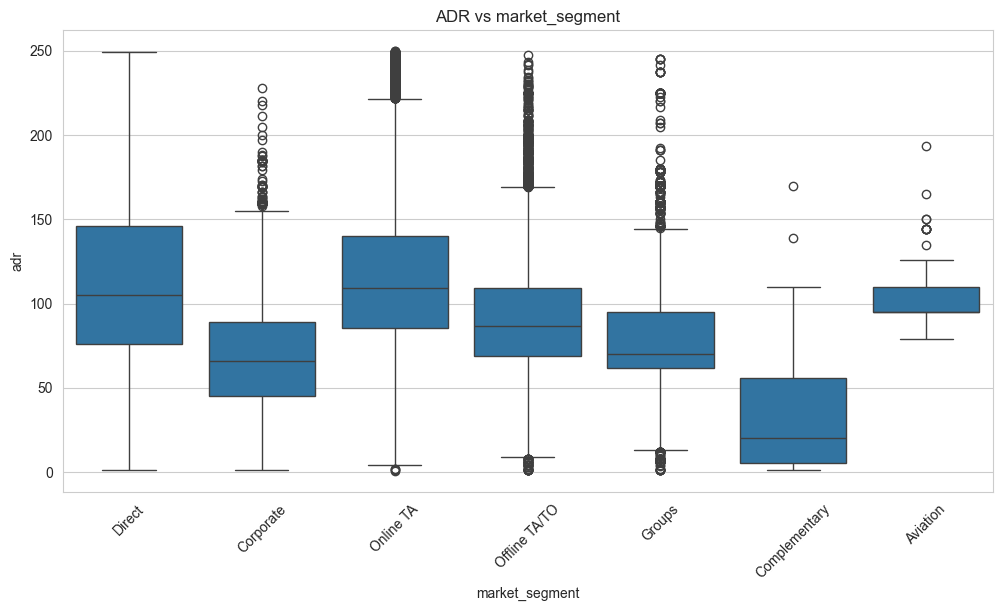

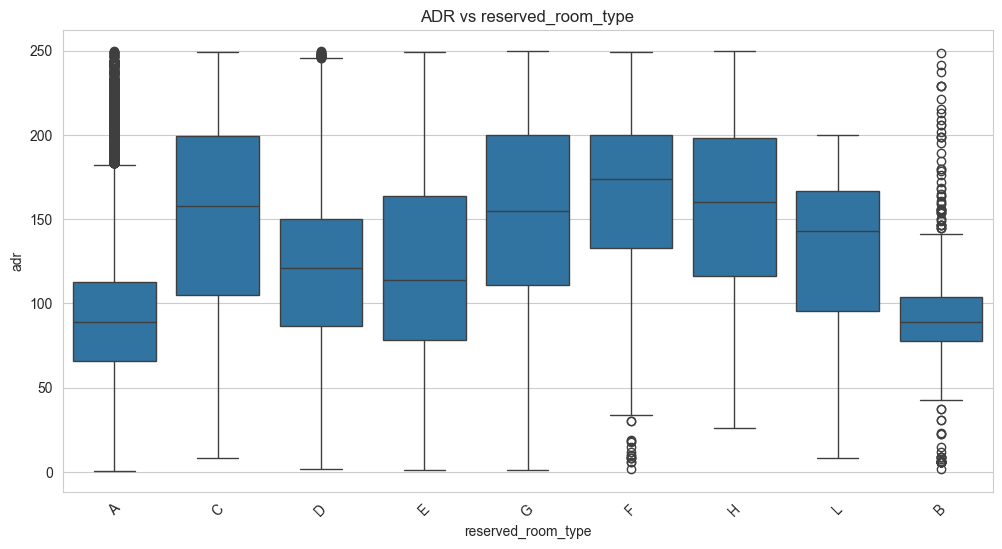

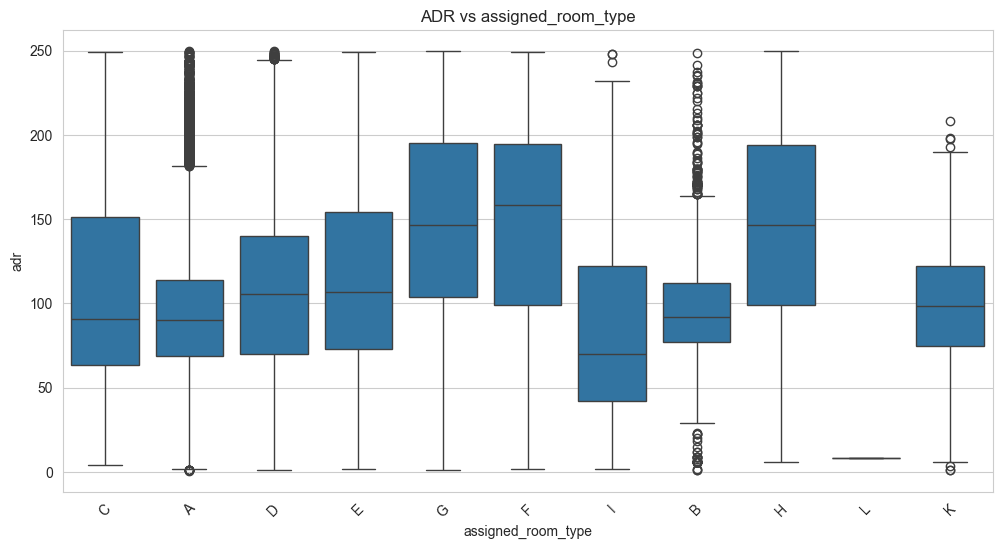

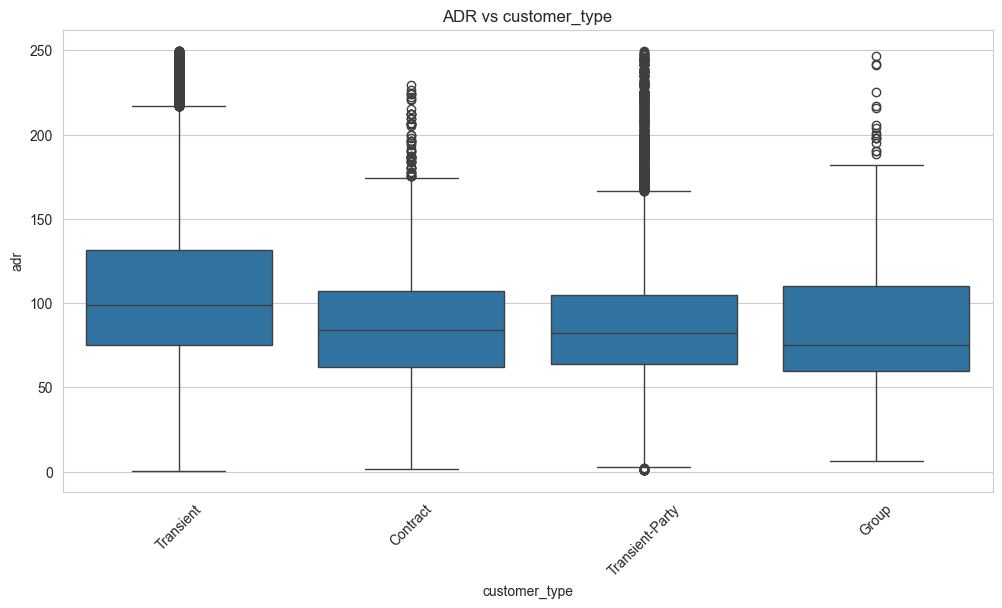

In [624]:
categorias_principales = [
    "market_segment",
    "reserved_room_type",
    "assigned_room_type",
    "customer_type"
]

for i in categorias_principales:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x=i, y="adr")
    plt.xticks(rotation=45)
    plt.title(f"ADR vs {i}")
    plt.show()


In [596]:
# Lista con el orden de los meses a mostrar en las gráficas
months = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_63167/3076163007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


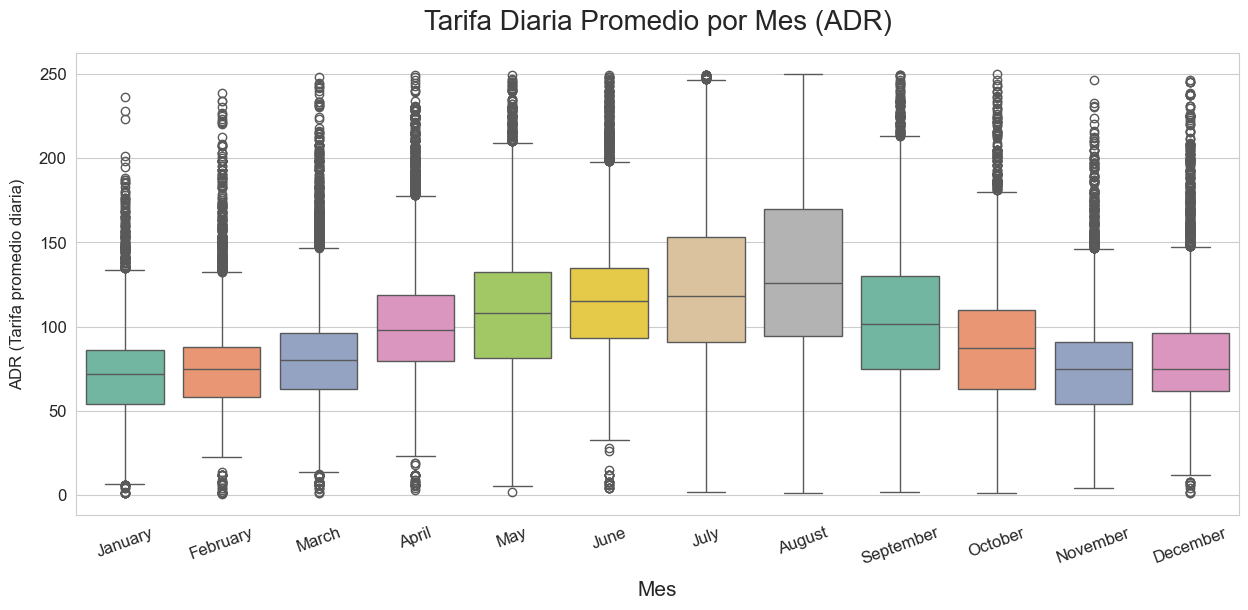

In [597]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

sns.boxplot(
    x=df['arrival_date'].dt.month_name(),
    y=df['adr'],
    order=months,
    palette='Set2'
)

plt.title('Tarifa Diaria Promedio por Mes (ADR)', fontsize=20, pad=17)
plt.xlabel('Mes', fontsize=15, labelpad=10)
plt.ylabel('ADR (Tarifa promedio diaria)', fontsize=12, labelpad=10)
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_63167/2352851809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


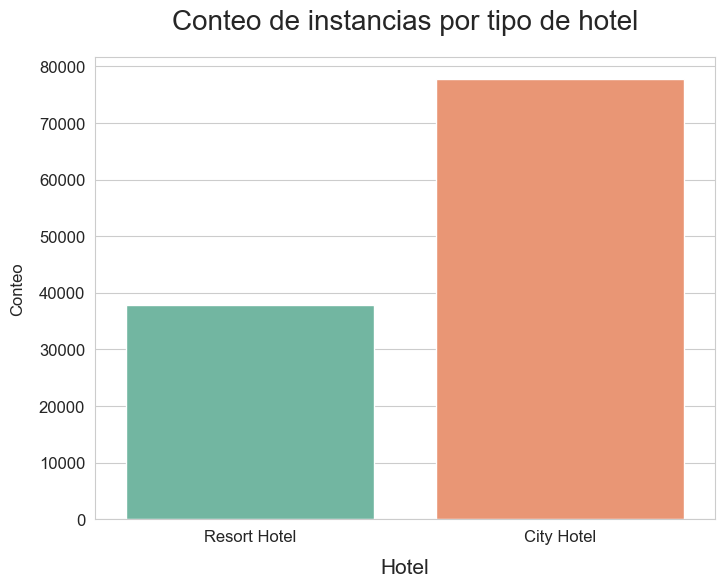

In [598]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df['hotel'],
    palette='Set2'
)

plt.title('Conteo de instancias por tipo de hotel', fontsize=20, pad=20)
plt.xlabel('Hotel', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_63167/1804744001.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


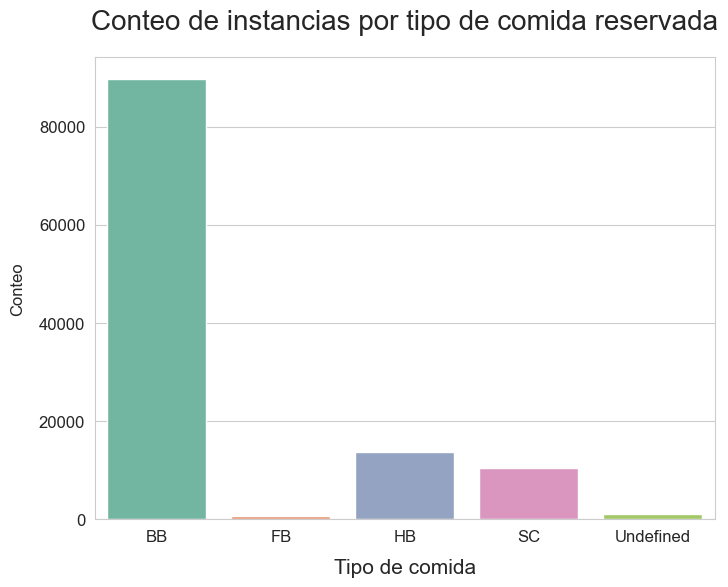

In [599]:

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

sns.countplot(
    x=df['meal'],
    palette='Set2'
)

plt.title('Conteo de instancias por tipo de comida reservada', fontsize=20, pad=20)
plt.xlabel('Tipo de comida', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/var/folders/64/4gbdgyc939b4_v9k9gyrf5sc0000gn/T/ipykernel_63167/970473016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


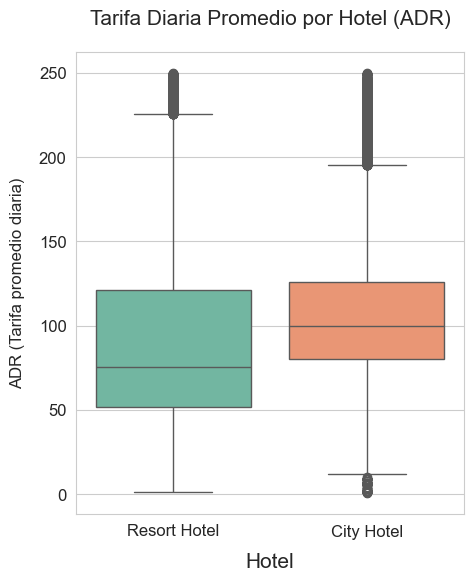

In [600]:
plt.figure(figsize=(5, 6))
sns.set_style("whitegrid")

sns.boxplot(
    x=df['hotel'],
    y=df['adr'],
    palette='Set2'
)

plt.title('Tarifa Diaria Promedio por Hotel (ADR)', fontsize=15, pad=20)
plt.xlabel('Hotel', fontsize=15, labelpad=10)
plt.ylabel('ADR (Tarifa promedio diaria)', fontsize=12, labelpad=10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

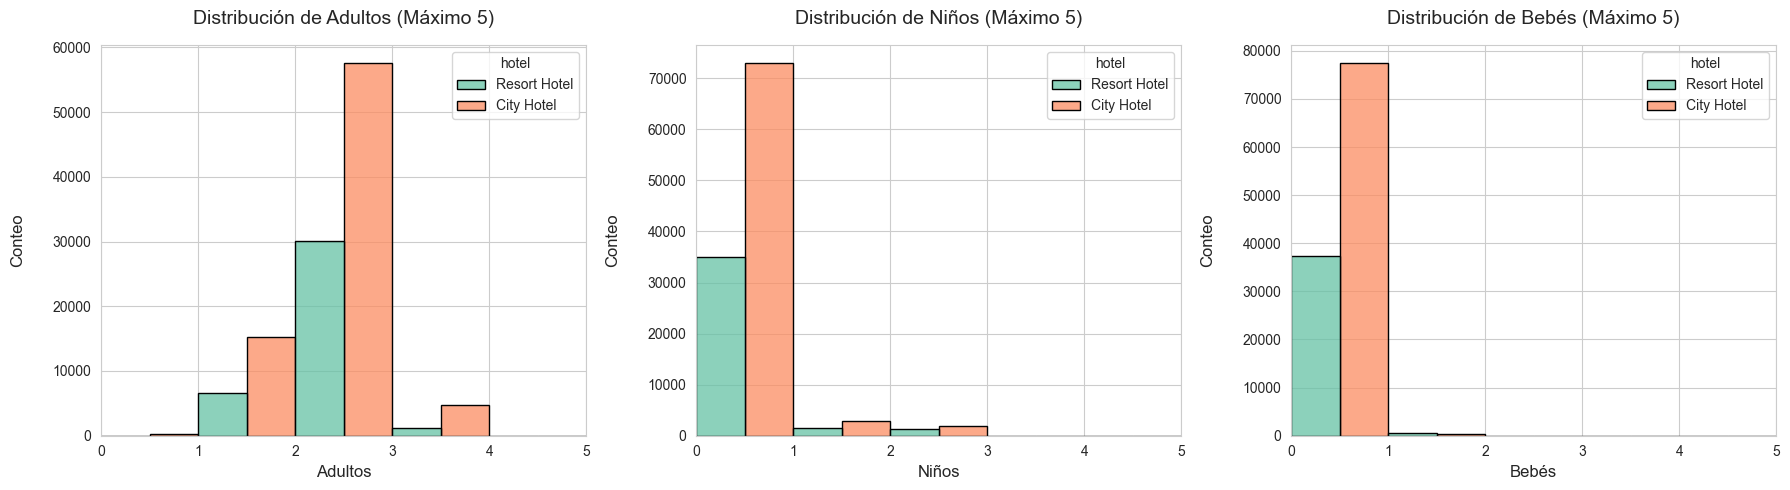

In [601]:
features = ["adults", "children", "babies"]
titles = {
    "adults": "Adultos",
    "children": "Niños",
    "babies": "Bebés"
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.set_style("whitegrid")

for ax, feature in zip(axes, features):
    sns.histplot(
        data=df[df[feature] <= 5],
        x=feature,
        hue="hotel",
        multiple="dodge",
        bins=range(0, 7),
        palette="Set2",
        edgecolor="black",
        ax=ax
    )

    ax.set_title(f"Distribución de {titles[feature]} (Máximo 5)", fontsize=14, pad=15)
    ax.set_xlim(0, 5)
    ax.set_xticks(range(0, 6))
    ax.set_xlabel(titles[feature], fontsize=12)
    ax.set_ylabel("Conteo", fontsize=12, labelpad=20)

plt.tight_layout()
plt.show()



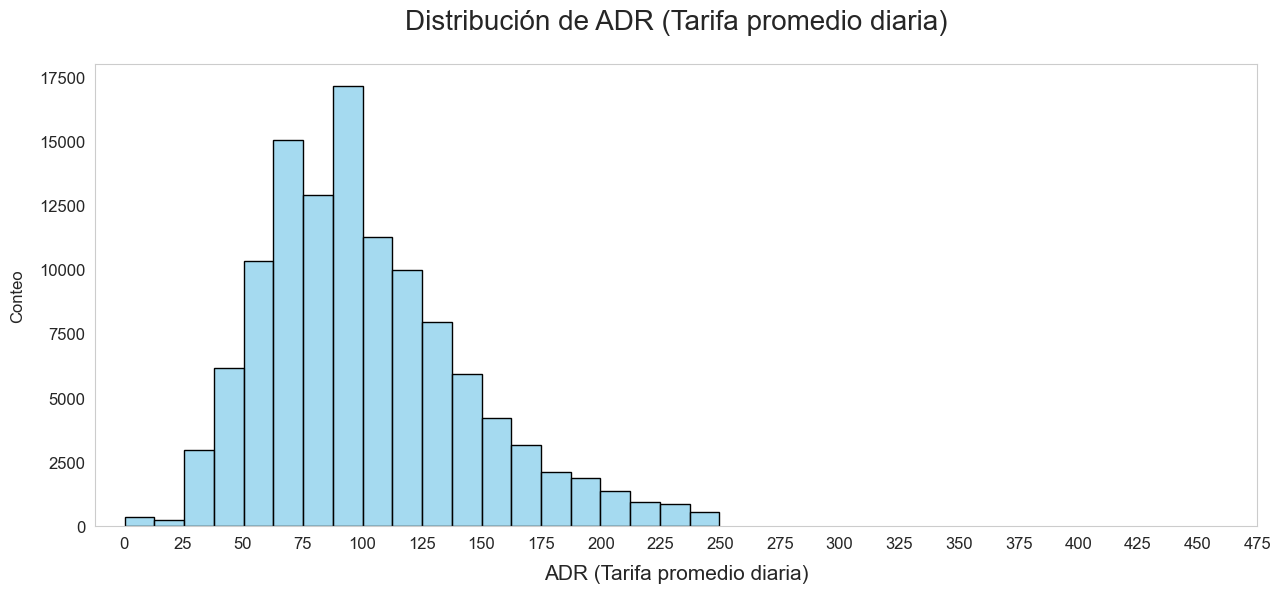

In [602]:
# Histograma ADR (Pendiente)
plt.figure(figsize=(15, 6))

sns.histplot(
    data=df,
    x='adr',
    bins=20,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribución de ADR (Tarifa promedio diaria)', fontsize=20, pad=25)
plt.xlabel('ADR (Tarifa promedio diaria)', fontsize=15, labelpad=10)
plt.ylabel('Conteo', fontsize=12, labelpad=10)
plt.xticks(range(0, 500, 25), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

plt.show()


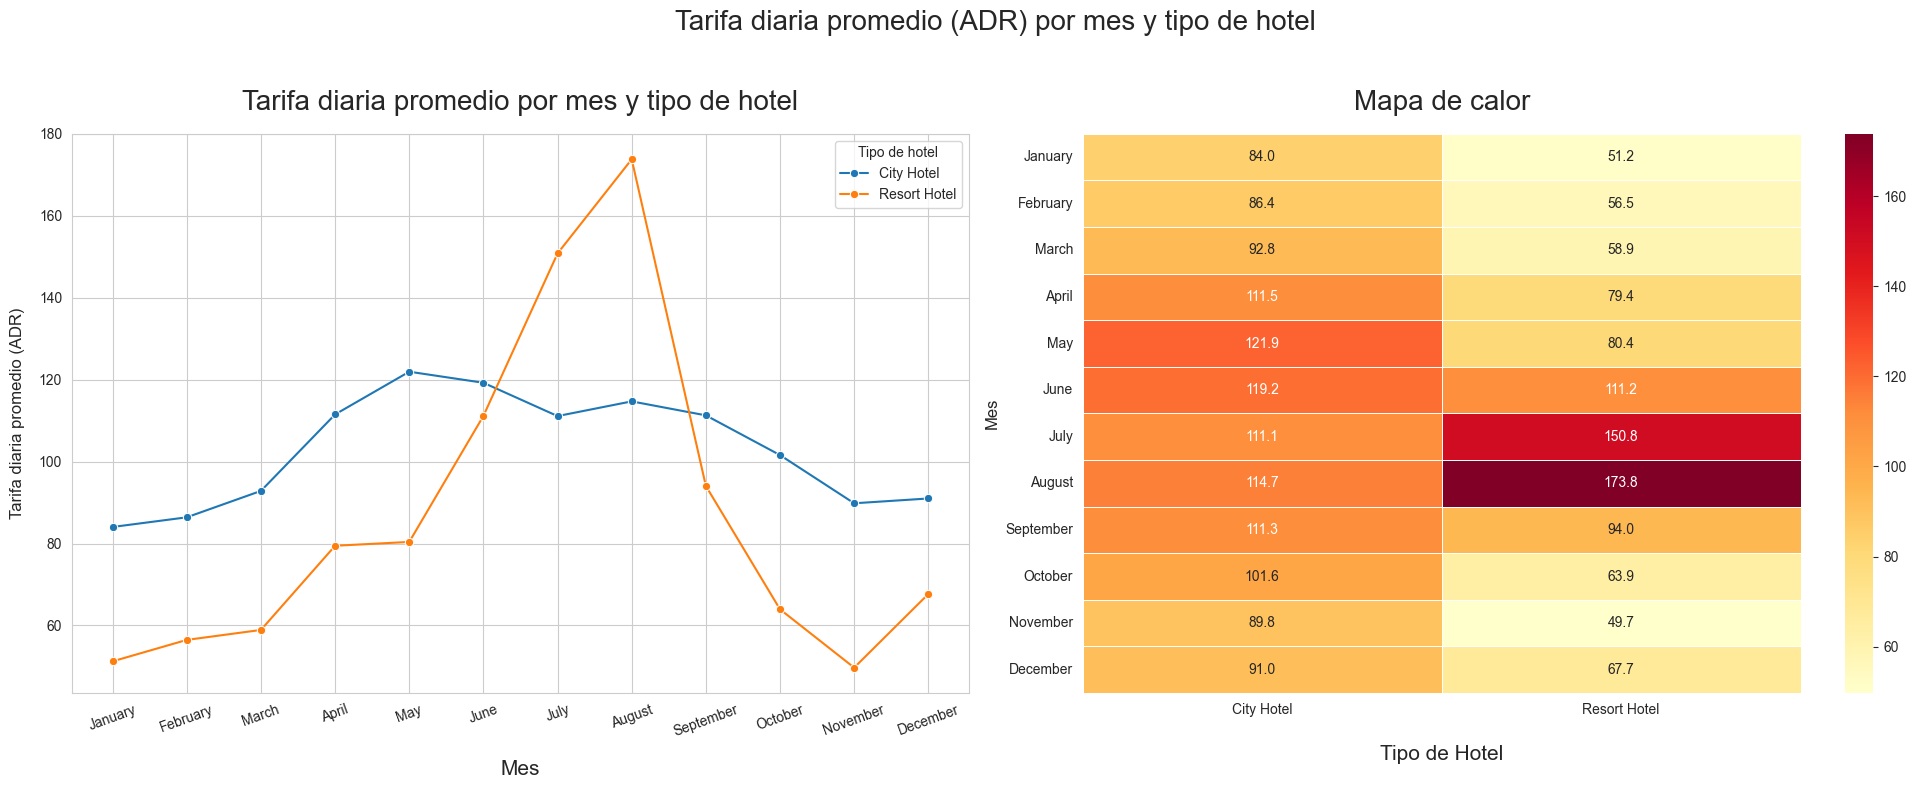

In [603]:
line_data = df.groupby([
    df['arrival_date'].dt.month_name(),
    'hotel'
])['adr'].mean().reset_index()

line_data['month'] = pd.Categorical(
    line_data['arrival_date'],
    categories=months,
    ordered=True
)

line_data = line_data.sort_values('month')

pivot = df.pivot_table(
    values='adr',
    index=df['arrival_date'].dt.month_name(),
    columns='hotel',
    aggfunc='mean'
)

pivot = pivot.reindex(months)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfica de líneas
sns.lineplot(
    line_data,
    x='month',
    y='adr',
    hue='hotel',
    marker='o',
    ax=ax1
)

ax1.set_title("Tarifa diaria promedio por mes y tipo de hotel", fontsize=20, pad=17)
ax1.set_xlabel("Mes", fontsize=15, labelpad=15)
ax1.set_ylabel("Tarifa diaria promedio (ADR)", fontsize=12, labelpad=10)
ax1.tick_params(axis='x', rotation=20)
ax1.legend(title="Tipo de hotel")

sns.heatmap(
    pivot,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    ax=ax2
)
ax2.set_title("Mapa de calor", fontsize=20, pad=17)
ax2.set_xlabel("Tipo de Hotel", fontsize=15, labelpad=20)
ax2.set_ylabel("Mes", fontsize=12)
ax2.tick_params(axis='y', rotation=0)

fig.suptitle("Tarifa diaria promedio (ADR) por mes y tipo de hotel", fontsize=20)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

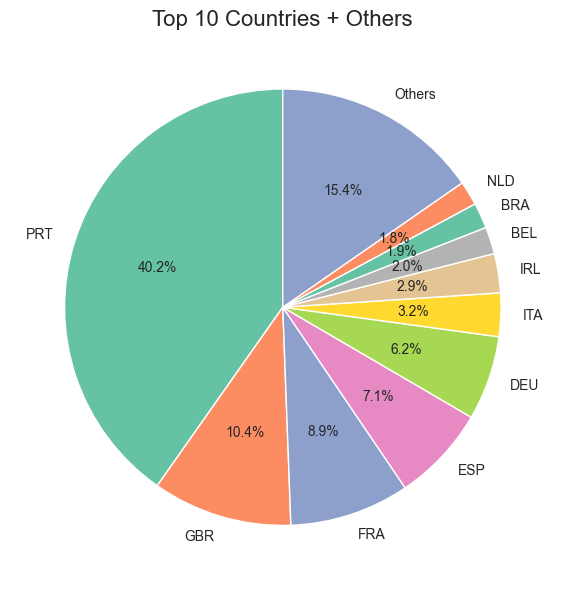

In [604]:
# Gráfico de pastel con Top 10 + Others
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Contar países
country_counts = df['country'].value_counts()

# Top 10
top10 = country_counts.head(10)

# Suma de los demás
others = country_counts.iloc[10:].sum()

# Crear serie final con "Others"
final_counts = top10.copy()
final_counts['Others'] = others

# Pie chart
plt.pie(
    final_counts,
    labels=final_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2', len(final_counts))
)

plt.title("Top 10 Countries + Others", fontsize=16)
plt.tight_layout()
plt.show()




Miranda

In [605]:
catrgorical_var = df.select_dtypes(include=['object'])
catrgorical_var

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
2,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
5,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
6,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
